# DSCI 311 Project 2: Sustainability and Energy usage/production

## 1) Data Cleaning/Preprocessing

In [1514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from sklearn.linear_model import LinearRegression

### Import the data

In [1516]:
energy = pd.read_csv("global-data-on-sustainable-energy.csv")
energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


### Rename / reorder columns

In [1518]:
energy_simple = energy.rename(columns={'Entity': 'Country', 'Access to electricity (% of population)': 'Electr_access', 'Access to clean fuels for cooking': 'Fuel_access',
                      'Renewable-electricity-generating-capacity-per-capita': 'Renew_production_capacity', 'Financial flows to developing countries (US $)': 'Aid', 
                                      'Renewable energy share in the total final energy consumption (%)': 'Prop_renew_energy_consumed', 'Electricity from fossil fuels (TWh)': 'FF_produced', 
                                      'Electricity from nuclear (TWh)': 'Nuc_produced', 'Electricity from renewables (TWh)': 'Renew_produced', 
                                      'Low-carbon electricity (% electricity)': 'Prop_lowcarbon_produced', 'Primary energy consumption per capita (kWh/person)': 'Energy_consumption', 
                                      'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Energy_use_perGDP', 'Value_co2_emissions_kt_by_country': 'CO2_emissions', 
                                       'Renewables (% equivalent primary energy)': 'Prop_renew_energy_produced', 'Density\\n(P/Km2)': 'Density', 'Land Area(Km2)': 'Land_area', 'Latitude': 'Lat', 'Longitude': 'Long'})

### Making sure all number vals are ints/floats

In [1520]:
for col in energy_simple.columns:
    if not isinstance(energy_simple[col][0], float) or isinstance(energy_simple[col][0], int):
        print(col)

Country
Year
Density


In [1521]:
energy_simple['Density'] = energy_simple['Density'].str.replace(',', '', regex=False).astype(float)

I am also interested in looking at the total GDP for each country (instead of the gdp growth/gdp per capita), as well as the total energy consumption (instead of energy consumption per capita). Let's add these columns.

In [1523]:
# Add a column of total GDP (Billions of $)
energy_simple['gdp'] = (energy_simple['gdp_per_capita'] * energy_simple['Density'] * energy_simple['Land_area']) / 1000000000

# Add a column of total energy consumption (convert to TWh)
energy_simple['Energy_consumption_total'] = (energy_simple['Energy_consumption'] * energy_simple['Density'] * energy_simple['Land_area']) / 1000000000

# drop unnecessary variables that we just needed for calculation
energy_simple.drop(columns=['gdp_per_capita', 'gdp_growth', 'Energy_consumption', 'Density', 'Land_area'], inplace=True) 

In [1524]:
# Reorder the columns so similar variables are together
new_order = ['Country', 'Year', 'Renew_production_capacity', 'FF_produced', 'Nuc_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 
             'Prop_renew_energy_produced', 'Electr_access', 'Fuel_access', 'Prop_renew_energy_consumed', 'Energy_consumption_total', 'Energy_use_perGDP', 
             'Aid', 'CO2_emissions', 'gdp', 'Lat', 'Long']

energy_simple = energy_simple[new_order]

### Granularity

In [1526]:
print(max(energy_simple["Year"]), min(energy_simple["Year"])) # year range

print(len(energy_simple.groupby("Country").count().reset_index()["Country"])) # number of countries

2020 2000
176


In [1527]:
years=energy_simple.groupby("Country").count()
missing_yrs = years[years["Year"] != 21]
print(missing_yrs["Year"]) # countries with missing time series data
print(energy_simple.shape[0])

Country
French Guiana     1
Montenegro       14
Serbia           14
South Sudan       8
Name: Year, dtype: int64
3649


**Granularity of the data:** Each row of the data represents a different year, from 2000-2020, repeated for each country.
There are 176 countries and 21 rows per country, except for 4 countries which have less years represented. There are 3649 rows total.

### Dealing with Missing values

In [1530]:
missing_values = energy_simple.isna().sum()
proportion_missing = missing_values / energy_simple.shape[0]
print(f'Missing proportions of variables:\n {proportion_missing.sort_values(ascending=False)}')

Missing proportions of variables:
 Prop_renew_energy_produced    0.585640
Aid                           0.572486
Renew_production_capacity     0.255138
CO2_emissions                 0.117292
gdp                           0.077281
Energy_use_perGDP             0.056728
Prop_renew_energy_consumed    0.053165
Fuel_access                   0.046314
Nuc_produced                  0.034530
Prop_lowcarbon_produced       0.011510
FF_produced                   0.005755
Renew_produced                0.005755
Electr_access                 0.002740
Lat                           0.000274
Long                          0.000274
Energy_consumption_total      0.000274
Year                          0.000000
Country                       0.000000
dtype: float64


<Axes: >

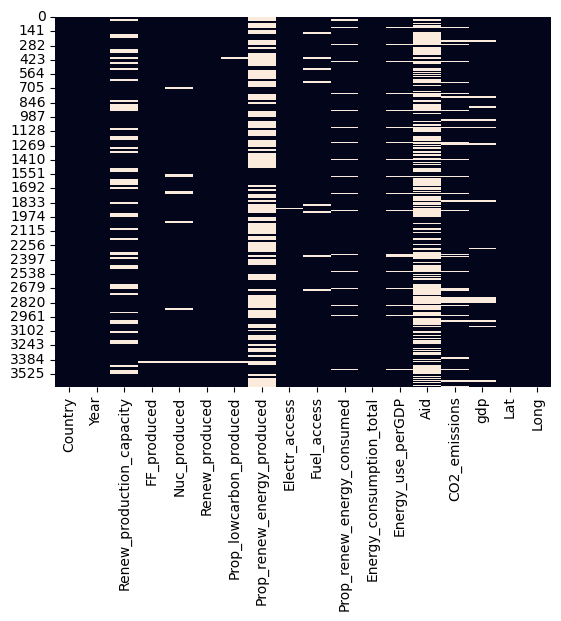

In [1531]:
sns.heatmap(energy_simple.isna(), cbar=False)

**The variables with the most significant proportions of missing variables are:**
- Prop_renew_energy_produced, or the proportion of a country's overall energy they produce that comes from renewables. Over 50% of this data is missing, so it might be best practice to just drop the variable entirely rather than try to interpolate it for thousands of rows/entries.

In [1533]:
energy_simple = energy_simple.drop('Prop_renew_energy_produced', axis=1)

- Aid, or the financial assistance a developing country received from developed countries for renewable energy. Around half of this data is missing. However, we can reasonably infer that a missing value is equivalent to a value of 0 dollars in financial aid, and therefore fill the NA values with 0.

In [1535]:
energy_simple['Aid'] = energy_simple['Aid'].fillna(0)

- Renew_production_capacity, or the renewable energy production capacity per person in a given country. Let's examine where the data is missing:

In [1537]:
energy_simple[energy_simple['Renew_production_capacity'].isna()].groupby('Country').count()['Year']

Country
Albania                   21
Australia                 21
Austria                   21
Belarus                   21
Belgium                   21
Bermuda                   21
Bosnia and Herzegovina    21
Bulgaria                  21
Canada                    21
Croatia                   21
Cyprus                    21
Czechia                   21
Denmark                   21
Estonia                   21
Finland                   21
France                    21
Germany                   21
Greece                    21
Hungary                   21
Iceland                   21
Ireland                   21
Israel                    21
Italy                     21
Japan                     21
Latvia                    21
Lithuania                 21
Luxembourg                21
Malta                     21
Montenegro                14
Netherlands               21
New Zealand               21
North Macedonia           21
Norway                    21
Poland                    21
Portug

Since there are 21 rows per country (2000-2020), it seems like the data is missing in every single row/year for a lot of these countries. In addition, some of these countries would be points of interest in our analysis like the United States (known high GDP and high CO2 emissions, good for analysis). Because of this, I am choosing to exclude this entire variable from the data because it would be too difficult to fill.

In [1539]:
energy_simple = energy_simple.drop('Renew_production_capacity', axis=1)

- CO2_emissions has about 11% of the data missing. Let's examing the countries that have some data missing vs. all. We can drop the rows for countries that have no data at all for CO2 emissions, because this variable is key in our analysis.

In [1541]:
missing = energy_simple[energy_simple['CO2_emissions'].isna()].groupby('Country').count().reset_index()

countries_with_data = missing[missing['Year'] < 21] # countries with at least some data
countrynames_with_data = countries_with_data['Country'].tolist() # list of country names

countries_to_drop = missing[missing['Year'] == 21] # countries with all CO2 data missing
countrynames_drop = countries_to_drop['Country'].tolist() # list of country names

print(f"The maximum number of missing CO2_emissions entries for a country in this filtered dataset is only {
countries_with_data['Year'].max()}. Let's drop the rest, since the rest have no data at all for CO2.")

The maximum number of missing CO2_emissions entries for a country in this filtered dataset is only 4. Let's drop the rest, since the rest have no data at all for CO2.


In [1542]:
# drop the countries/rows with no data at all:
i_to_drop = energy_simple[energy_simple['Country'].isin(countrynames_drop)].index # find indices of rows to drop
energy_simple = energy_simple.drop(i_to_drop) # drop the rows

In [1543]:
# We also need to consider countries which may have less than 21 rows of data in the first place, 
# and examine how much of their CO2 data is missing
print(missing_yrs["Year"])
missing[(missing['Country'] == 'French Guiana') | (missing['Country'] == 'Montenegro') | (missing['Country'] == 'Serbia') | (missing['Country'] == 'South Sudan')]

Country
French Guiana     1
Montenegro       14
Serbia           14
South Sudan       8
Name: Year, dtype: int64


,Country,Year,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
58,French Guiana,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0
105,Montenegro,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1
140,Serbia,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1
149,South Sudan,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1


Since French Guiana only has 1 entry in the entire dataset and the CO2 value is missing for that 1 entry, we will drop the entire row/country.

In [1545]:
# drop French Guiana
i_to_drop = energy_simple[energy_simple['Country'] == 'French Guiana'].index # index
energy_simple = energy_simple.drop(i_to_drop) # drop row

I also want to make sure there is enough data for GDP by country, since I want to examine country GDP in relation to my other variables.

In [1547]:
energy_simple[energy_simple['gdp'].isna()].groupby('Country').count().reset_index()[['Country', 'Year']]

,Country,Year
0,Afghanistan,2
1,Aruba,2
2,Cayman Islands,6
3,Czechia,21
4,Eritrea,9
5,Nauru,10
6,New Caledonia,1
7,Sao Tome and Principe,1
8,Somalia,13
9,South Sudan,5


The only country with no data at all for gdp is Czechia. Since Gdp is an important part of our analysis, we can remove this data for Czechia for consistency.

In [1549]:
# Drop Czechia
i_to_drop = energy_simple[energy_simple['Country'] == 'Czechia'].index # index
energy_simple = energy_simple.drop(i_to_drop) # drop rows

Next, missing variables like Nuc_produced (electricity produced from nuclear energy by country) and Fuel_access can be filled with 0 due to lack of data.

In [1551]:
energy_simple['Nuc_produced'] = energy_simple['Nuc_produced'].fillna(0)
energy_simple['Fuel_access'] = energy_simple['Fuel_access'].fillna(0)

The rest of our missing data is missing at a proportion of less than 10% of the total, and for these variables the missing values are also spread out over different years. Let's fill the rest of the missing data with the average of the values for each country, to try and preserve country-level trends.

In [1553]:
columns_to_fill = ['FF_produced', 'Renew_produced', 'Prop_lowcarbon_produced', 'Electr_access', 'Prop_renew_energy_consumed', 'Energy_use_perGDP', 'CO2_emissions', 'gdp']

for column in columns_to_fill: 
    energy_simple[column] = energy_simple.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))

<Axes: >

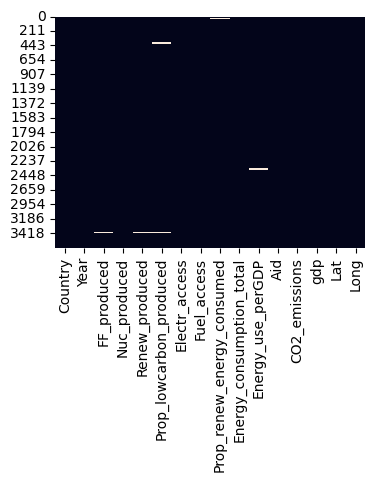

In [1577]:
plt.figure(figsize=(4,3))
sns.heatmap(energy_simple.isna(), cbar=False)

The remaining missing data that couldn't be filled by column averages is data which is missing from every single year for a particular country. Since we can see above that this is very few countries, let's just drop those rows to complete our data cleaning.

In [1579]:
energy_simple.dropna(inplace=True)

<Axes: >

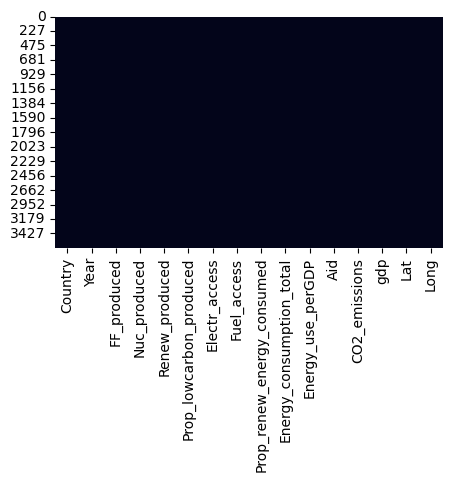

In [1581]:
# let's look at how much it's improved!
plt.figure(figsize=(5,3))
sns.heatmap(energy_simple.isna(), cbar=False)

In [1583]:
print(len(energy_simple.groupby("Country").count().reset_index()["Country"])) # number of countries
years=energy_simple.groupby("Country").count()
missing_yrs = years[years["Year"] != 21]
print(missing_yrs["Year"]) # countries with missing time series data
print(energy_simple.shape[0])

158
Country
Montenegro     14
Serbia         14
South Sudan     8
Name: Year, dtype: int64
3291


After cleaning and dropping irrelevant parts of our data, we now have a granularity of 158 countries and 21 rows per country, except for the 3 countries which have less years represented.

### Our Variables After Data Cleaning:

In [1585]:
energy_simple.head()

,Country,Year,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
0,Afghanistan,2000,0.16,0.0,0.31,65.957440,1.613591,6.2,44.99,11.841685,1.64,20000.0,760.000000,17.181920,33.93911,67.709953
1,Afghanistan,2001,0.09,0.0,0.50,84.745766,4.074574,7.2,45.60,9.270478,1.74,130000.0,730.000000,17.181920,33.93911,67.709953
2,Afghanistan,2002,0.13,0.0,0.56,81.159424,9.409158,8.2,37.83,8.251837,1.40,3950000.0,1029.999971,7.021644,33.93911,67.709953
3,Afghanistan,2003,0.31,0.0,0.63,67.021280,14.738506,9.5,36.66,8.999530,1.40,25970000.0,1220.000029,7.462182,33.93911,67.709953
4,Afghanistan,2004,0.33,0.0,0.56,62.921350,20.064968,10.9,44.24,7.992345,1.20,0.0,1029.999971,8.272184,33.93911,67.709953


#### Variables relating to production:
- **FF_produced:** Electricity generated from fossil fuels (coal, oil, gas) (TWh)
- **Nuc_produced:** Electricity generated from nuclear power (TWh)
- **Renew_produced:** Electricity generated from renewable sources (hydro, solar, wind, etc.) (TWh)
- **Prop_lowcarbon_produced:** Percentage of electricity from low-carbon sources (BOTH nuclear and renewables).

#### Variables relating to consumption:
- **Electr_access:** The percentage of population with access to electricity
- **Fuel_access:** The percentage of the population with access to clean fuels (for cooking)
- **Prop_renew_energy_consumed:** Percentage of the total ENERGY consumption that is from renewable sources
- **Energy_consumption_total:** Country's ENERGY consumption / demand, total (TWh)
- **Energy_use_perGDP:** Reflects the efficiency of energy use per unit of GDP (rate of converting energy into GDP or $)

#### Variables Which Could Provide Context or Influences:
- **Country:** country name
- **Year:** years ranging from 2000-2020
- **Aid:** Assistance (US dollars) from developed countries to developing countries for clean energy projects
- **CO2_emissions:** Carbon dioxide emissions per country in kilotons.
- **gdp:** TOTAL gross domestic product for the country in that year (Billions of dollars)
- **Latitude:** Latitude of the country's centroid (decimal degrees)
- **Longitude:** Longitude of the country's centroid (decimal degrees)

## 2) Exploratory Data Analysis

In [1595]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
no_countries = energy_simple.drop(columns=["Country"])
data_scaled = scaler.fit_transform(no_countries)

In [1597]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=2)  # Choose 2 for visualization or experiment with different numbers

# Fit and transform the data
data_pca = pca.fit_transform(data_scaled)

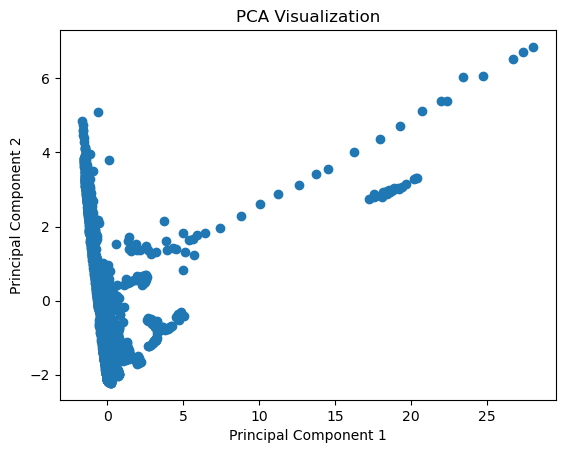

In [1601]:
import matplotlib.pyplot as plt

plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

### Ways to look at the data:
- **Country-based analysis** (grouping by country) to compare overall/summary metrics of countries in terms of GDP, energy consumption, renewable energy, CO2 emissions, etc.
- **Time-series analysis** (grouping by year) to look at trends over time, either for individual countries or for global visualizations (multiple countries with different characteristics)

First, I will group by country to look at values of the different variables in terms of their average across all the years, per country.

# **Questions:**
Do high GDP countries have higher levels of renewable energy production, or do they rely more on fossil fuels?



(PREDICTION!!!:) which countries are likely to have higher CO₂ emissions based on factors like:
- electricity from FF 
- electricity from renewables
- proportion of energy from renewables
- total energy consumption (is it high?)
- gdp


Transition to clean energy: Identify countries transitioning toward low-carbon energy by comparing RENEWABLE ELECTRICITY production and the proportion of TOTAL energy derived from renewables.


correlation: Countries with high FF electricity production and low renewable production likely have significant CO2 EMISSIONS from both power generation and other sectors.

## Country-based analysis (group by country)

I want to compare the correlations between average variables once I group by country and take the average of all years 2000-2020. This will allow me to see larger-scale patterns in the data simplified over the range of time.

I'm also interested in looking at the distribution of metrics for each country, like for example: average GDP and average CO2 emissions, to see which countries have the highest and the lowest values.

In [1453]:
# group by country
country_averages = energy_simple.groupby('Country').mean().reset_index()
country_averages.head()

,Country,Year,FF_produced,Nuc_produced,Renew_produced,Prop_lowcarbon_produced,Electr_access,Fuel_access,Prop_renew_energy_consumed,Energy_consumption_total,Energy_use_perGDP,Aid,CO2_emissions,gdp,Lat,Long
0,Afghanistan,2010.0,0.189524,0.000000,0.740952,78.872636,52.520488,19.802381,25.6805,27.286752,2.0390,2.982952e+07,4073.000025,17.181920,33.939110,67.709953
1,Algeria,2010.0,46.895714,0.000000,0.365238,0.742125,99.108146,98.904762,0.2870,554.134892,4.4985,3.852381e+05,119921.000066,162.388799,28.033886,1.659626
2,Angola,2010.0,2.040476,0.000000,4.420952,68.980548,35.138564,44.933333,57.6970,100.549123,2.8965,4.535714e+06,21689.499863,96.677575,-11.202692,17.873887
3,Antigua and Barbuda,2010.0,0.271429,0.000000,0.002857,0.861557,98.823761,100.000000,0.2005,3.167717,3.6240,1.385714e+06,512.999998,1.339125,17.060816,-61.796428
4,Argentina,2010.0,76.309524,6.722857,33.811429,35.772016,98.241525,98.469048,9.5605,990.460423,3.4975,2.279024e+08,160462.001865,436.685434,-38.416097,-63.616672


## Distribution Analysis

Let's visualize some of the variables per country like CO2 emissions and GDP per country. These plots will show the distribution shape, and we will see if the data is skewed or normally distributed. This will also help us see any potential outliers in each variable.

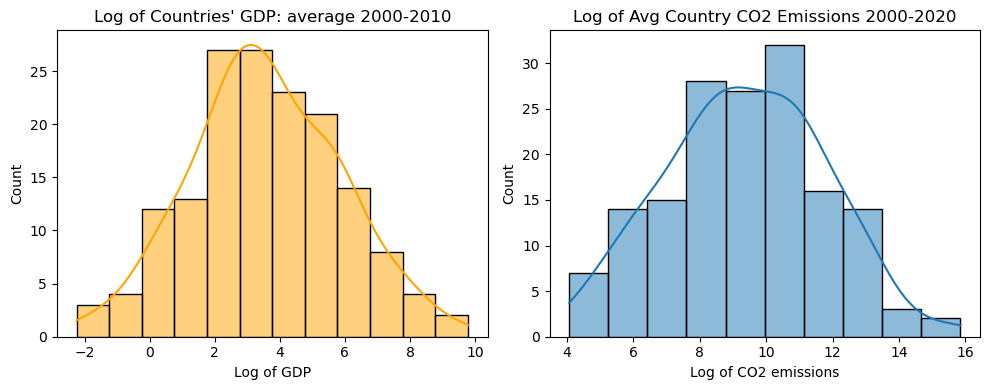

In [1456]:
# plot Average CO2 emissions and Average GDP from 2000-2020 from all countries (LOG SCALE)

# add log scale to df
country_averages['log_gdp'] = np.log(country_averages['gdp'])
country_averages['log_co2'] = np.log(country_averages['CO2_emissions'])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 2 plots

sns.histplot(x=country_averages['log_gdp'], kde=True, ax=axes[0], color='orange')
axes[0].set_title("Log of Countries' GDP: average 2000-2010")
axes[0].set_xlabel("Log of GDP")

sns.histplot(x=country_averages['log_co2'], kde=True, ax=axes[1])
axes[1].set_title("Log of Avg Country CO2 Emissions 2000-2020")
axes[1].set_xlabel("Log of CO2 emissions")

plt.tight_layout()
plt.show()

Both average GDP and average CO2 emissions across the time period would be skewed right if plotted in original units. This means they would have a long right tail, i.e. only a few countries have extremely high values whereas the bulk of countries have much lower GDP and CO2 emissions. This makes sense because there are few large, industrialized countries which have very high GDP as well as CO2 emissions.

However, both variables take on a normal distribution if plotted on a log scale, with log(CO2_emissions) centered around 9 kilotons and log(GDP) centered around 3 billion dollars.

In [1458]:
country_averages['cr'] = np.cbrt(country_averages['Electr_access'])

Text(0.5, 1.0, '')

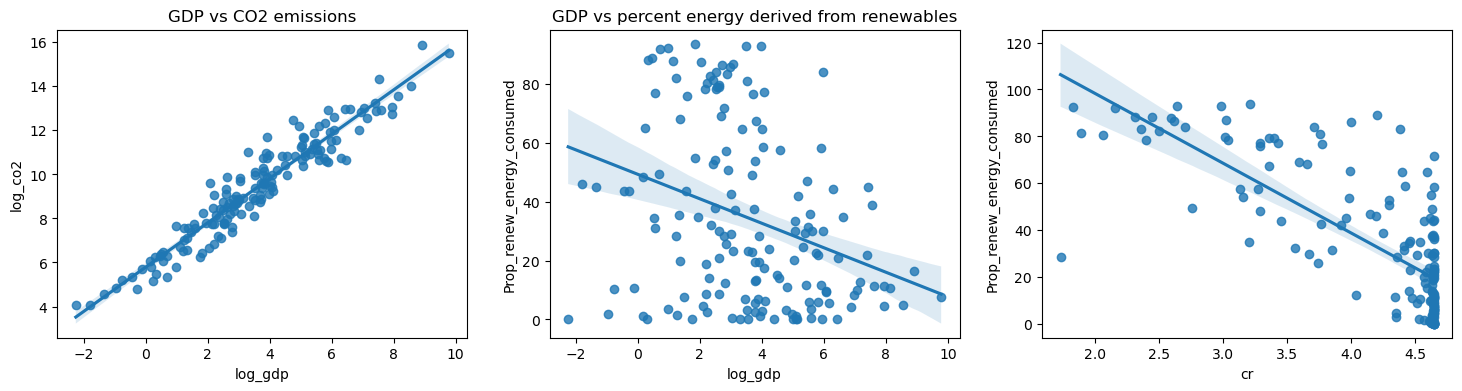

In [1459]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # 3 plots

sns.regplot(x='log_gdp', y='log_co2', data=country_averages, ax=axes[0])
axes[0].set_title("GDP vs CO2 emissions")

sns.regplot(x='log_gdp', y='Prop_renew_energy_consumed', data=country_averages, ax=axes[1])
axes[1].set_title("GDP vs percent energy derived from renewables")

sns.regplot(x='cr', y='Prop_renew_energy_consumed', data=country_averages, ax=axes[2])
axes[2].set_title("")

Let's look at some of the countries with the highest and lowest average gdp over the entire time period.

In [1461]:
sortCO2 = country_averages.sort_values('gdp', ascending=False).reset_index()
top5 = sortCO2.loc[:5]
lowest5 = sortCO2.loc[((sortCO2.shape[0]) - 5):]

display(top5[['Country', 'gdp']], lowest5[['Country', 'gdp']])

,Country,gdp
0,United States,17727.522963
1,China,7435.303210
2,Japan,5165.489690
3,Germany,3390.326351
4,France,2832.308628
5,United Kingdom,2792.220989


,Country,gdp
153,Dominica,0.466686
154,Tonga,0.381691
155,Sao Tome and Principe,0.258431
156,Kiribati,0.165504
157,Nauru,0.105473


let's look at the country with the highest GDP, the U.S. (also one of the highest CO2 emitters) and look at its electricity production by source (fossil fuels, renewables, etc).

Text(0, 0.5, 'Density')

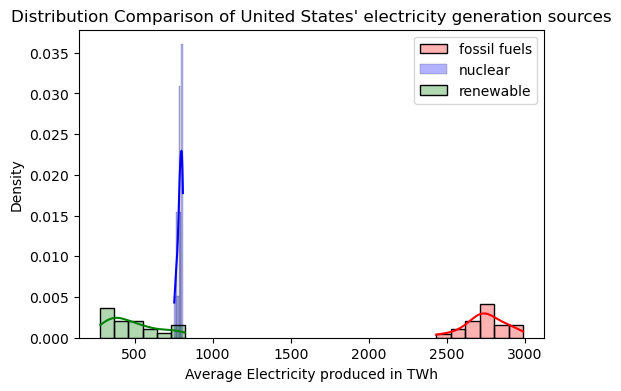

In [1463]:
usa = energy_simple[energy_simple['Country'] == 'United States']

# overlapping plot
plt.figure(figsize=(6,4))
sns.histplot(x=usa['FF_produced'], stat='density', kde=True, color='red', alpha=0.3, label='fossil fuels')
sns.histplot(x=usa['Nuc_produced'], stat='density', kde=True, color='blue', alpha=0.3, label='nuclear')
sns.histplot(x=usa['Renew_produced'], stat='density', kde=True, color='green', alpha=0.3, label='renewable')

# labels
plt.legend()
plt.title("Distribution Comparison of United States' electricity generation sources")
plt.xlabel('Average Electricity produced in TWh')
plt.ylabel('Density')

I'd like to compare high-gdp countries to low-gdp ones in terms of their energy usage and CO2 emissions.
- maybe change this to use top5 and lowest5 from above?

Text(0.5, 1.0, 'Fossil fuels vs renewables used for electricity production for high and low GDP countries')

<Figure size 1000x1000 with 0 Axes>

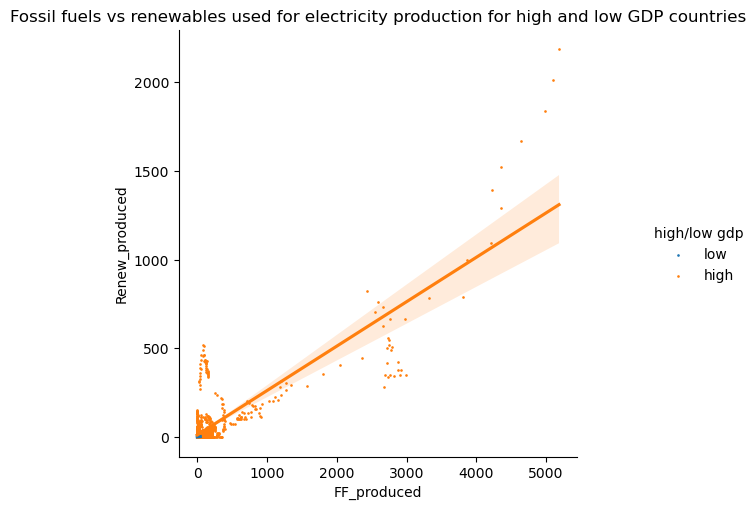

In [1465]:
# first separate countries into high and low GDP groups
gdp_analysis = energy_simple.copy()
gdp_analysis['high/low gdp'] = ['high' if x > energy_simple['gdp'].median() else 'low' for x in energy_simple['gdp']]

plt.figure(figsize=(10,10))

sns.lmplot(x='FF_produced', y='Renew_produced', hue='high/low gdp', data=gdp_analysis, fit_reg=True, scatter_kws={
    's': 0.8, 'alpha': 1, 'linewidths': 1}, 
    );

# labels
plt.title('Fossil fuels vs renewables used for electricity production for high and low GDP countries')

### Some more explorations between variables

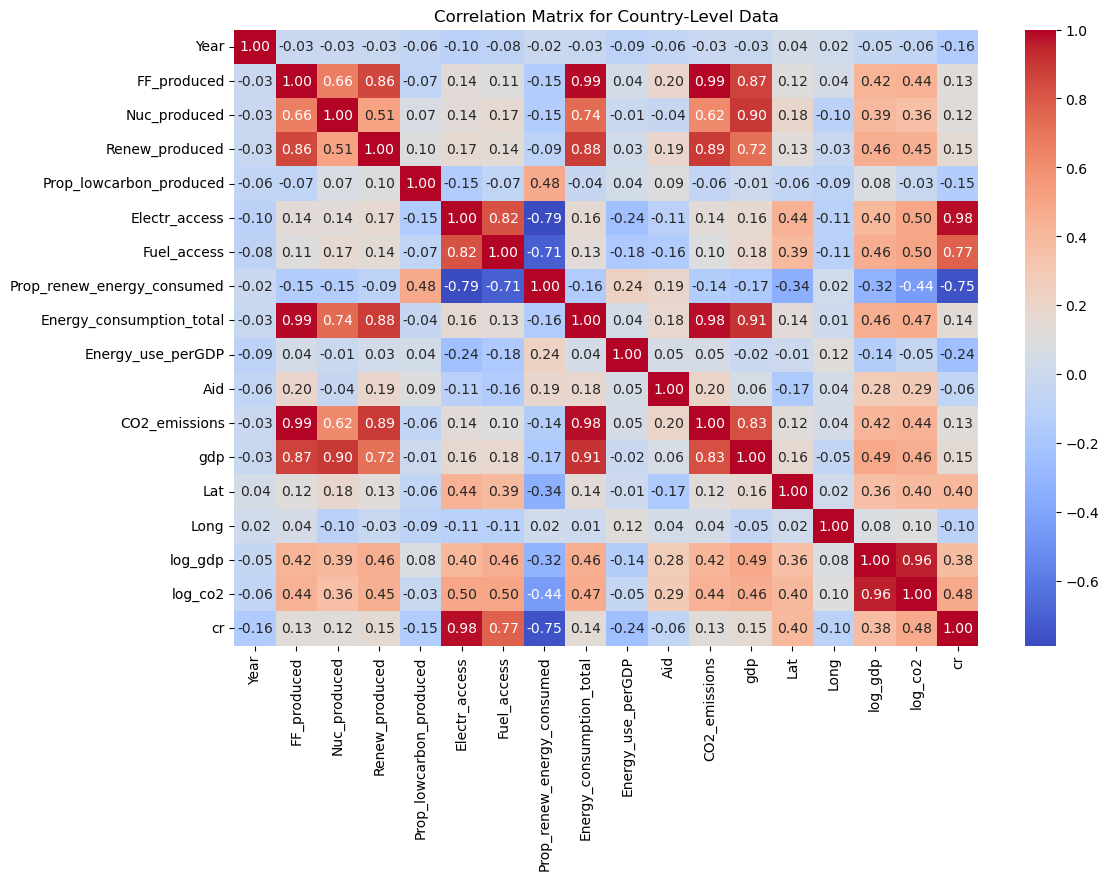

In [1467]:
# Calculate correlations for country-level data
corr = country_averages.set_index('Country').corr()

# Heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Country-Level Data')
plt.show()

### Some notable correlations to explore:
- gdp is highly positively correlated with electricity production, from all sources
- CO2 emissions are also, interestingly, highly positively correlated with all three electricity-generation sources. This is likely due to the fact that any country which is generating a high amount of any type of energy is also probably generating fossil fuel byproducts.
- There is also high correlation between the production of electricity from different sources, like fossil fuel production and renewable production. Again, this is likely because anywhere that is generating lots of energy is probably going to be generating lots of _types_ of energy, not just one.
- Strong positive correlation between country gdp and CO2 emissions, unsurprisingly.

- There are strong _negative_ correlations between electricity access and the proportion of renewable energy consumed, and also fuel access and the proportion of renewable energy consumed. In other words, as access to electricity and fuel goes up in countries, less of the energy people are consuming is renewable and more of it is things like fossil fuels.
- Another interesting negative correlation (not as strong) is between the proportion of renewable energy consumed and the _overall_ energy consumption. This is interesting because it indicates that as overall energy consumption increases, the amount of that energy consumption that comes from renewables goes down, i.e. when people start to consume _more_ energy they turn to fossil fuels more often.